# Model Building#rev_1
 (continue from FE_part_2)

<b><font color='blue'>The goal of this case study is to build a predictive model that a machine will fail in the next 24 hours due to a certain component failure (component 1, 2, 3, or 4) or not.</b>



In [1]:
#Importing libraries
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("Solarize_Light2")
%matplotlib inline

<b> All the featured dataset has been saved in "preprocessed_2.csv" for ease of analysis.

In [2]:
#Importing the "preprocessed_2.csv".
import pandas as pd
labeled_features= pd.read_csv("preprocessed_2.csv")
# Format datetime field which comes in as string

labeled_features['datetime'] = pd.to_datetime(labeled_features['datetime'], format="%Y-%m-%d %H:%M:%S")

In [3]:
labeled_features.head(2)

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,158.271400,403.235951,92.439132,32.516838,200.872430,495.777958,96.535487,52.355876,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 09:00:00,160.528861,384.645962,86.944273,29.527665,197.363125,486.459056,114.342061,42.992509,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none


In [4]:
labeled_features.tail(2)

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
291339,100,2016-01-01 03:00:00,162.742669,395.222827,101.589735,44.382754,179.438162,481.253908,103.158233,50.771941,...,0.0,0.0,0.0,82.875,7.875,82.875,52.875,model4,5,none
291340,100,2016-01-01 06:00:00,165.475310,413.771670,94.132837,35.123072,192.483414,447.816524,104.081073,48.314561,...,0.0,0.0,0.0,83.000,8.000,83.000,53.000,model4,5,none


In [5]:
labeled_features.describe()

,machineID,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,volt_mean_3h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,...,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000
mean,50.499243,158.072427,404.132559,92.380133,36.147905,183.473297,489.041432,109.348749,44.628544,170.772904,...,0.027724,0.027164,0.022990,0.019949,0.009837,53.350081,51.314525,52.510320,53.614339,11.330321
std,28.866522,11.872268,40.817688,8.777961,4.207675,11.904876,40.789312,8.858979,4.218082,9.498823,...,0.166505,0.164701,0.151716,0.140975,0.099214,62.422314,59.140184,58.764991,59.605785,5.827532
min,1.000000,97.333604,138.432075,51.237106,14.877054,134.886496,237.641009,77.169913,28.581727,125.532506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,150.364806,379.495414,86.862934,33.457547,175.271243,463.339007,103.505650,41.788281,164.446156,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,7.000000
50%,50.000000,158.163452,406.881373,92.116192,36.088485,182.768621,489.167126,108.505559,44.292088,170.431738,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.000000,165.836186,432.055945,97.275210,38.667060,190.893051,515.379948,114.006260,47.041124,176.608355,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.000000,235.726785,565.962115,160.026994,68.001841,255.124717,695.020984,185.951998,76.791072,241.420717,...,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


In [6]:
#https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8
#https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

## <b> Split the "preprocessed.csv" with Sklearn "train_test_split" function with "shuffle=False".

In [7]:
X = labeled_features.drop(['datetime', 'machineID', 'failure'], 1)

In [8]:
X.head(2)

,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,volt_mean_3h,rotate_mean_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,158.271400,403.235951,92.439132,32.516838,200.872430,495.777958,96.535487,52.355876,180.133784,440.608320,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
1,160.528861,384.645962,86.944273,29.527665,197.363125,486.459056,114.342061,42.992509,176.364293,439.349655,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18


In [9]:
X_final = pd.get_dummies(X)
X_final.head(2)

,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,volt_mean_3h,rotate_mean_3h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,158.271400,403.235951,92.439132,32.516838,200.872430,495.777958,96.535487,52.355876,180.133784,440.608320,...,0.0,20.000,215.000,155.000,170.000,18,0,0,1,0
1,160.528861,384.645962,86.944273,29.527665,197.363125,486.459056,114.342061,42.992509,176.364293,439.349655,...,0.0,20.125,215.125,155.125,170.125,18,0,0,1,0


In [10]:
X_final.describe()

,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,volt_mean_3h,rotate_mean_3h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
count,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,...,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000
mean,158.072427,404.132559,92.380133,36.147905,183.473297,489.041432,109.348749,44.628544,170.772904,446.605411,...,0.009837,53.350081,51.314525,52.510320,53.614339,11.330321,0.160022,0.170004,0.349982,0.319993
std,11.872268,40.817688,8.777961,4.207675,11.904876,40.789312,8.858979,4.218082,9.498823,33.131243,...,0.099214,62.422314,59.140184,58.764991,59.605785,5.827532,0.366627,0.375637,0.476965,0.466474
min,97.333604,138.432075,51.237106,14.877054,134.886496,237.641009,77.169913,28.581727,125.532506,211.811184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.364806,379.495414,86.862934,33.457547,175.271243,463.339007,103.505650,41.788281,164.446156,427.562122,...,0.000000,13.250000,12.000000,13.000000,12.875000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,158.163452,406.881373,92.116192,36.088485,182.768621,489.167126,108.505559,44.292088,170.431738,448.381061,...,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,165.836186,432.055945,97.275210,38.667060,190.893051,515.379948,114.006260,47.041124,176.608355,468.444174,...,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000,0.000000,0.000000,1.000000,1.000000
max,235.726785,565.962115,160.026994,68.001841,255.124717,695.020984,185.951998,76.791072,241.420717,586.682904,...,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
X_final_train = X_final.values
X_final_train[1]

array([160.52886052, 384.64596164,  86.94427269,  29.52766452,
       197.36312454, 486.45905612, 114.34206081,  42.99250944,
       176.36429322, 439.34965502, 101.55320892,  36.10558003,
        18.95221004,  51.32963577,  13.78927949,   6.73773919,
       151.33568223, 346.14933504,  75.23790486,  25.990511  ,
       200.87242982, 527.34982545, 114.34206081,  52.35587614,
       170.61486188, 446.36485915,  96.84978485,  39.73682577,
        12.51940225,  48.38507588,  10.17153979,   6.16323082,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  20.125     , 215.125     , 155.125     ,
       170.125     ,  18.        ,   0.        ,   0.        ,
         1.        ,   0.        ])

In [12]:
y_final=labeled_features['failure']
y_final.head(2)

0    none
1    none
Name: failure, dtype: object

In [13]:
y_final_train = y_final.values
y_final_train[1]

'none'

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_final_train, y_final_train,test_size=0.20, shuffle=False)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, shuffle=False)

In [15]:
print('X_train Observations: %d' % (len(X_train)))
print('y_train Observations: %d' % (len(y_train)))

print('X_cv Observations: %d' % (len(X_cv)))
print('y_cv Observations: %d' % (len(y_cv)))

print('X_test Observations: %d' % (len(X_test)))
print('y_test Observations: %d' % (len(y_test)))

X_train Observations: 186457
y_train Observations: 186457
X_cv Observations: 46615
y_cv Observations: 46615
X_test Observations: 58269
y_test Observations: 58269


In [16]:
#Reference: AAIC Case_study_2.
# This function plots the confusion matrices given y_i, y_i_hat.
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = ['comp1', 'comp2', 'comp3', 'comp4', 'none']
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

## Apply LinearSVC (Linear Support Vector Classification)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html


log_loss for c =  0.001 is 0.02142925498865818
log_loss for c =  0.01 is 0.021153480592533767
log_loss for c =  0.1 is 0.03646268843088329
log_loss for c =  1 is 0.04817243873851541
log_loss for c =  10 is 0.04615168662564736
log_loss for c =  100 is 0.0443635067634001


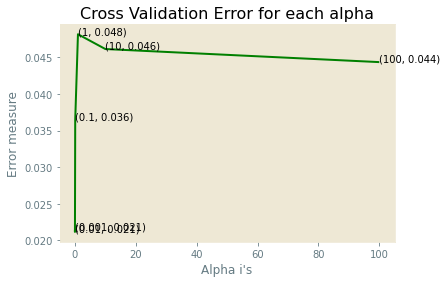

log loss for train data 0.006576693880840309
log loss for cv data 0.021153480592533767
log loss for test data 0.029427167166748976
-------------------- Confusion matrix --------------------


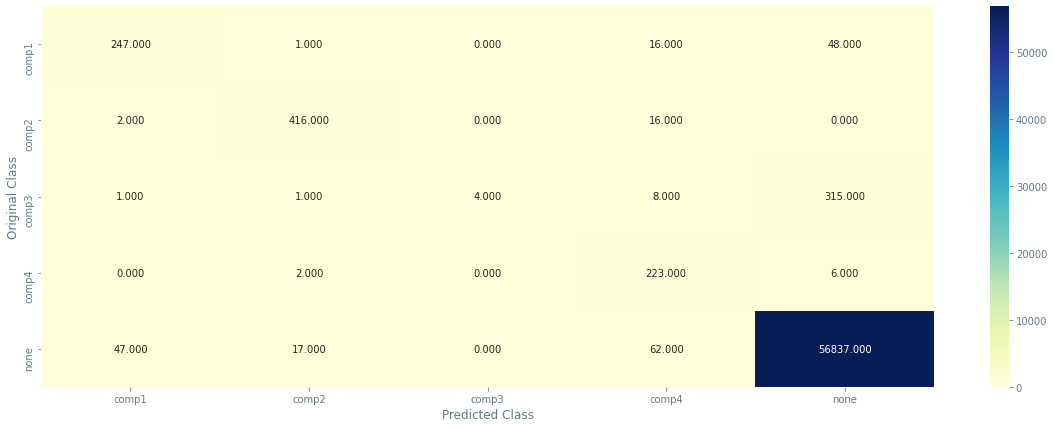

-------------------- Precision matrix (Columm Sum=1) --------------------


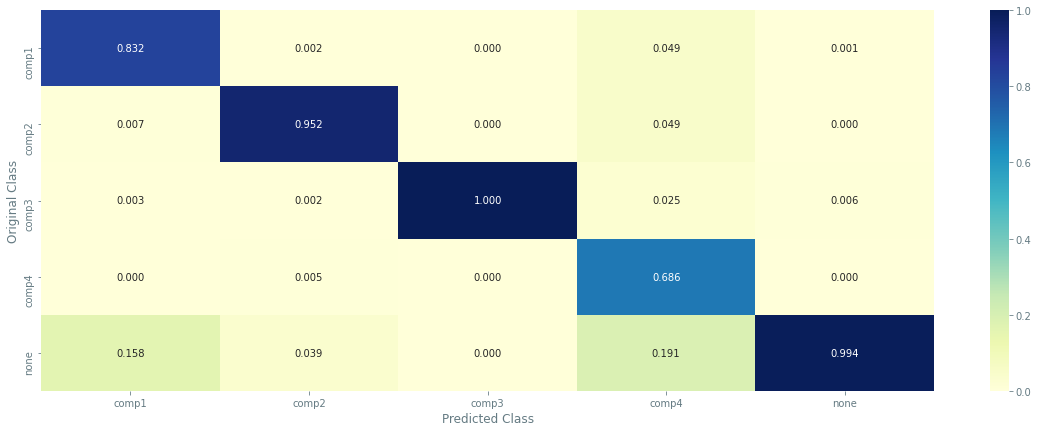

-------------------- Recall matrix (Row sum=1) --------------------


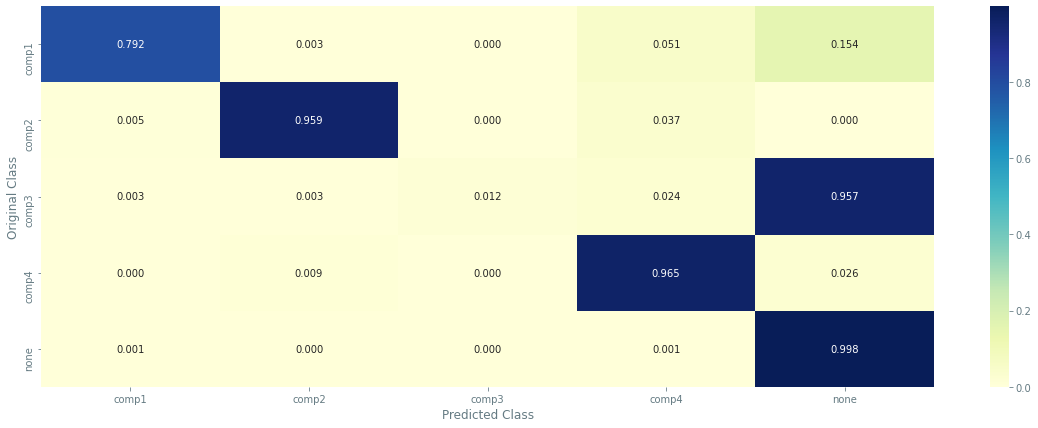

Wall time: 2min


In [33]:
%%time
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from tqdm import tqdm_notebook
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

alpha = [10 ** x for x in range(-3, 3)]
cv_log_error_array=[]
for i in tqdm_notebook(alpha):
    LRSVC_Clf= make_pipeline(StandardScaler(), LinearSVC(C=i,dual=False, random_state=0, tol=1e-5, class_weight='balanced'))
    LRSVC_Clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(LRSVC_Clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=LRSVC_Clf.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

LRSVC_Clf= make_pipeline(StandardScaler(), LinearSVC(C=alpha[best_alpha],dual=False, random_state=0, tol=1e-5, class_weight='balanced'))
LRSVC_Clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(LRSVC_Clf, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=LRSVC_Clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=LRSVC_Clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=LRSVC_Clf.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

### Apply LinearSVC + RandomizedSearchCV

In [41]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
Linear_cfl=LinearSVC(random_state=0, tol=1e-5)

prams={
    
      'loss':['hinge', 'squared_hinge'],
     'C':[0.001, 0.01, 10, 100, 1000],
     'intercept_scaling':[0.01, 1, 10, 100]
}

random_Linear_cfl=RandomizedSearchCV(Linear_cfl, param_distributions=prams, verbose=10, n_jobs=-1)
random_Linear_cfl.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 38.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 49.6min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 60.5min remaining: 13.3min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 60.8min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 65.7min finished


Wall time: 1h 10min 32s


RandomizedSearchCV(estimator=LinearSVC(random_state=0, tol=1e-05), n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 10, 100, 1000],
                                        'intercept_scaling': [0.01, 1, 10, 100],
                                        'loss': ['hinge', 'squared_hinge']},
                   verbose=10)

In [42]:
print(random_Linear_cfl.best_params_)

{'loss': 'hinge', 'intercept_scaling': 100, 'C': 100}


-------------------- Confusion matrix --------------------


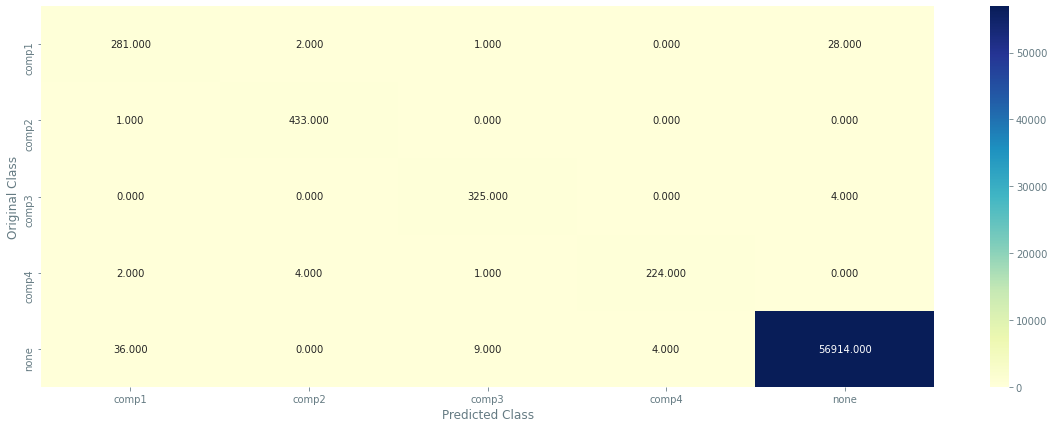

-------------------- Precision matrix (Columm Sum=1) --------------------


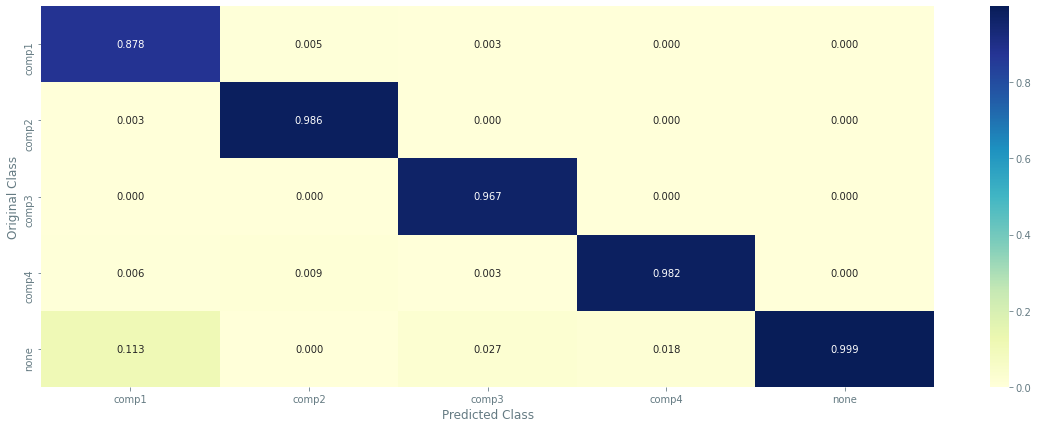

-------------------- Recall matrix (Row sum=1) --------------------


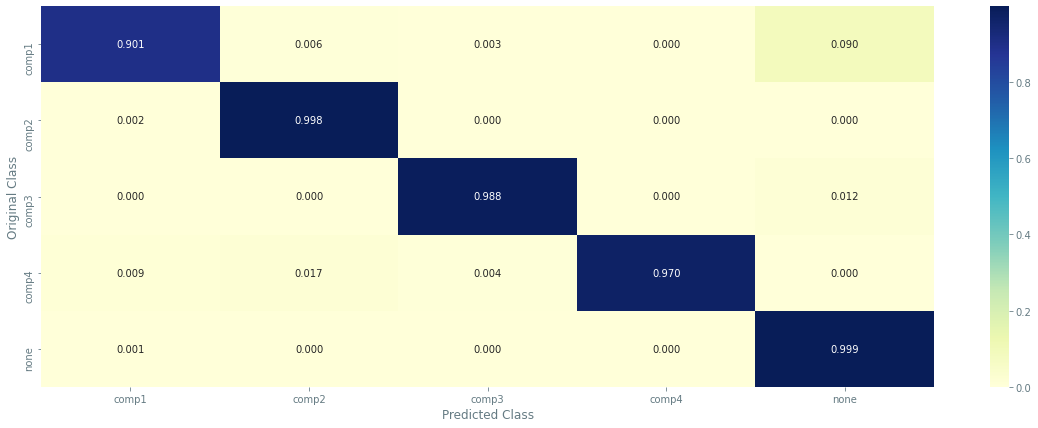

Wall time: 3min 56s


In [43]:
%%time
final_Linear_clf = LinearSVC(loss='hinge', intercept_scaling=100, C=100)
final_Linear_clf.fit(X_train,y_train)
plot_confusion_matrix(y_test, final_Extra_clf.predict(X_test))

## Apply SVC (Support Vector Classification)


log_loss for c =  0.001 is 0.026894798491197726
log_loss for c =  0.01 is 0.010742430683781671
log_loss for c =  0.1 is 0.010719106989655617
log_loss for c =  1 is 0.011399255993998273
log_loss for c =  10 is 0.011446668504059758
log_loss for c =  100 is 0.01146588126002167


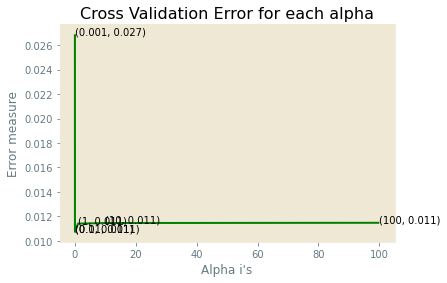

log loss for train data 0.004552845641011977
log loss for cv data 0.010719106989655617
log loss for test data 0.008685490297798611
-------------------- Confusion matrix --------------------


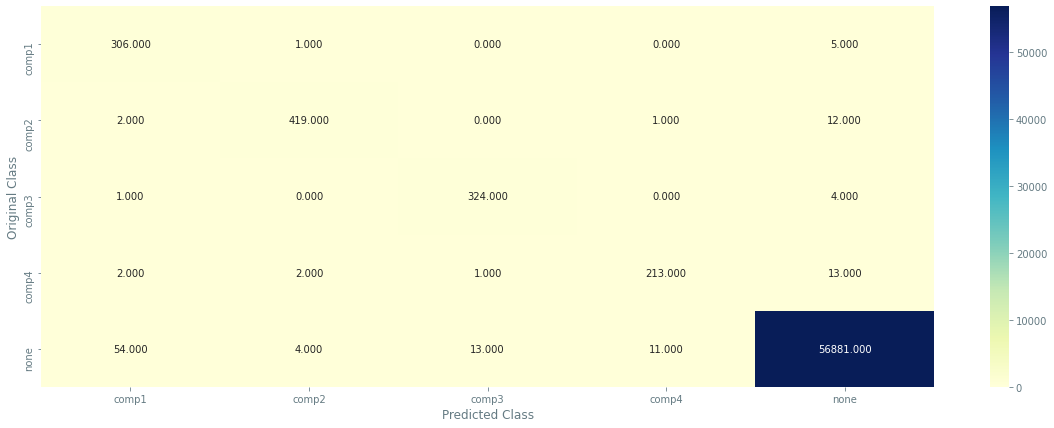

-------------------- Precision matrix (Columm Sum=1) --------------------


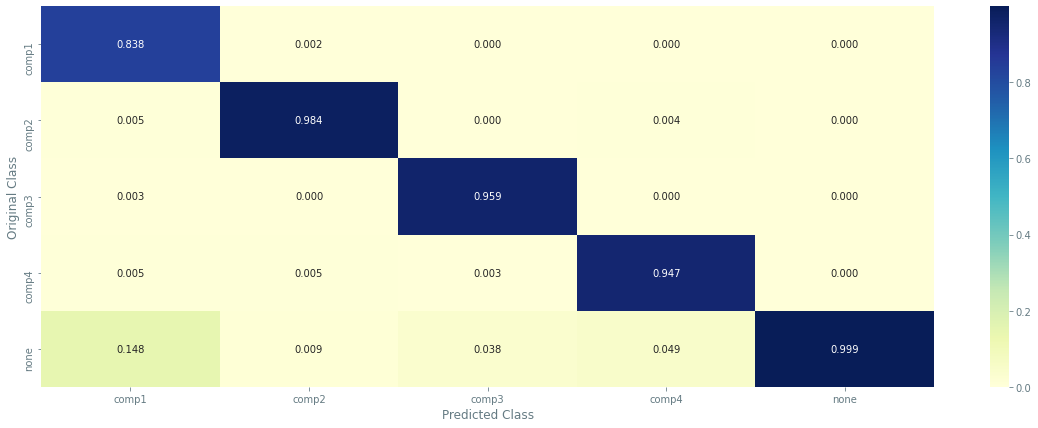

-------------------- Recall matrix (Row sum=1) --------------------


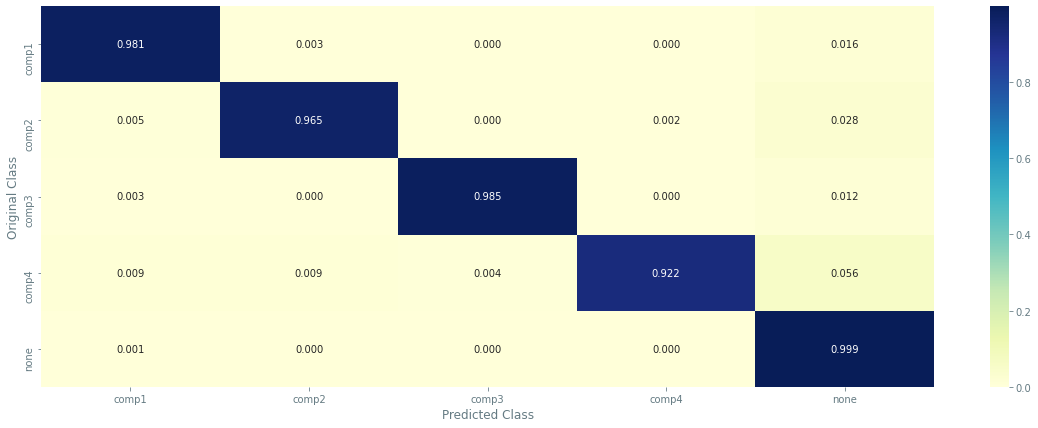

Wall time: 10h 33min 8s


In [19]:
%%time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from tqdm import tqdm_notebook
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

alpha = [10 ** x for x in range(-3, 3)]
cv_log_error_array=[]
for i in tqdm_notebook(alpha):
    SupportVector_Clf= make_pipeline(StandardScaler(), SVC(C=i, gamma='auto', class_weight='balanced'))
    SupportVector_Clf.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(SupportVector_Clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=SupportVector_Clf.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


SupportVector_Clf= make_pipeline(StandardScaler(), SVC(C=alpha[best_alpha], kernel='rbf',gamma='auto', class_weight='balanced'))
SupportVector_Clf.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(SupportVector_Clf, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=SupportVector_Clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=SupportVector_Clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=SupportVector_Clf.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

### Apply SVC with RandomizedSearchCV

With one hyperparameter tuning of SVC algorithm has taken 10 hrs. 33 min., so RandomizedSearchCV has  not been applied.

## Apply Extra Trees Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In [26]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
Extra_clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
Extra_clf.fit(X_train,y_train)

Wall time: 26.5 s


ExtraTreesClassifier(random_state=0)

-------------------- Confusion matrix --------------------


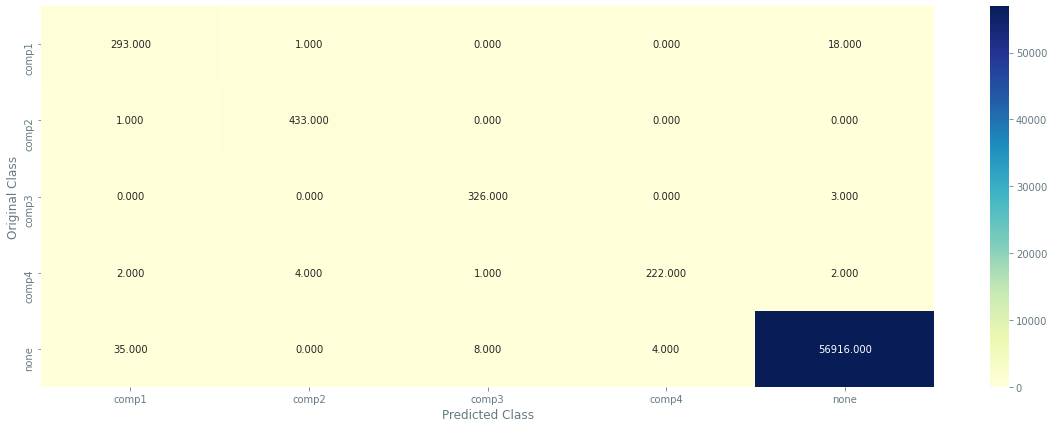

-------------------- Precision matrix (Columm Sum=1) --------------------


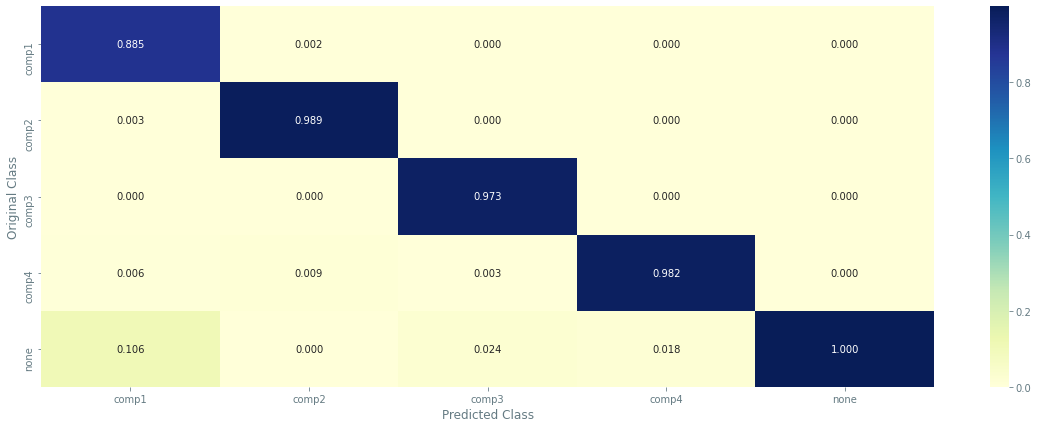

-------------------- Recall matrix (Row sum=1) --------------------


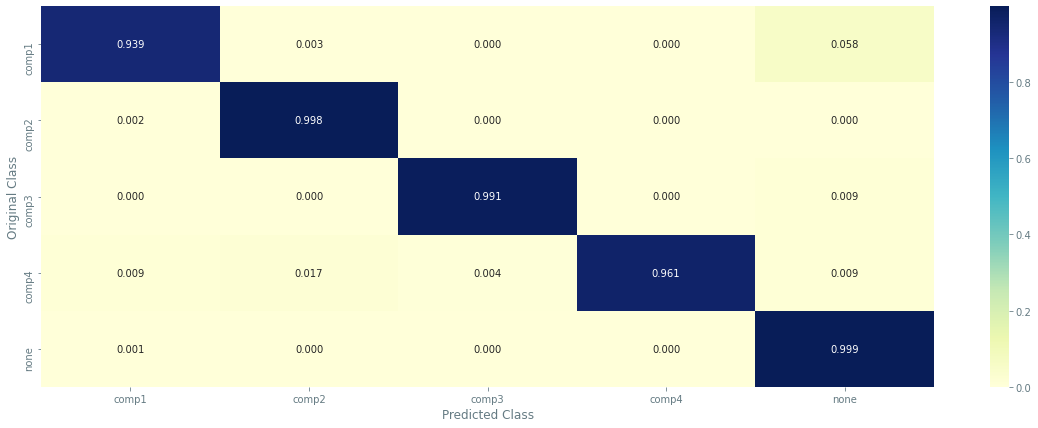

In [27]:
plot_confusion_matrix(y_test, Extra_clf.predict(X_test))

### Apply Extra Trees Classifier with RandomizedSearchCV

In [33]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier
Extra_clf = ExtraTreesClassifier(random_state=0)

prams={
    'n_estimators': [100, 200, 500],
     'max_depth':[None, 3, 10],
     'min_samples_split':[2, 4]
}

random_Extra_clf=RandomizedSearchCV(Extra_clf, param_distributions=prams, verbose=10, n_jobs=-1,)
random_Extra_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 29.0min remaining:  6.4min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 30.0min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 30.8min finished


Wall time: 31min 29s


RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=0), n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 10],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 200, 500]},
                   verbose=10)

In [34]:
print(random_Extra_clf.best_params_)

{'n_estimators': 100, 'min_samples_split': 4, 'max_depth': None}


-------------------- Confusion matrix --------------------


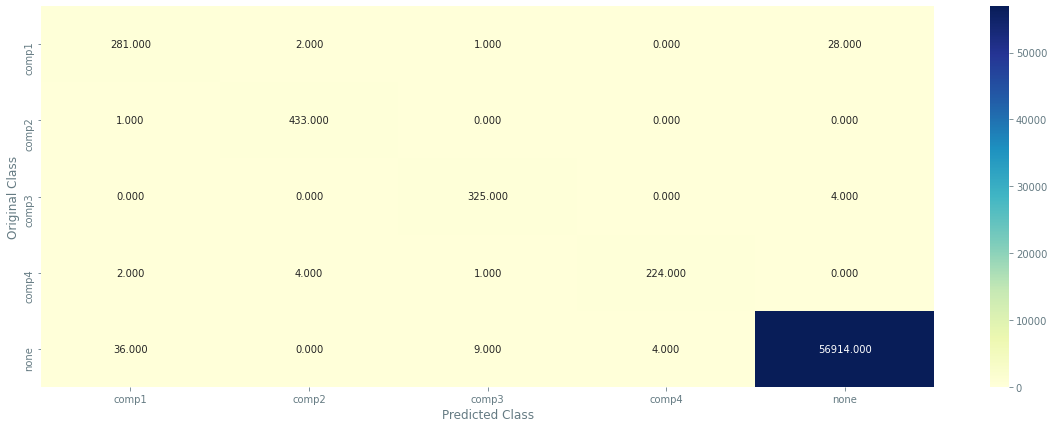

-------------------- Precision matrix (Columm Sum=1) --------------------


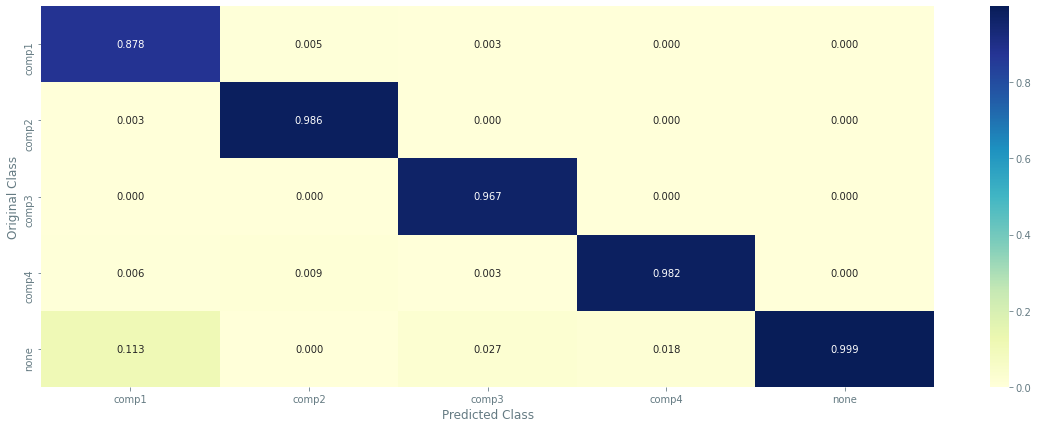

-------------------- Recall matrix (Row sum=1) --------------------


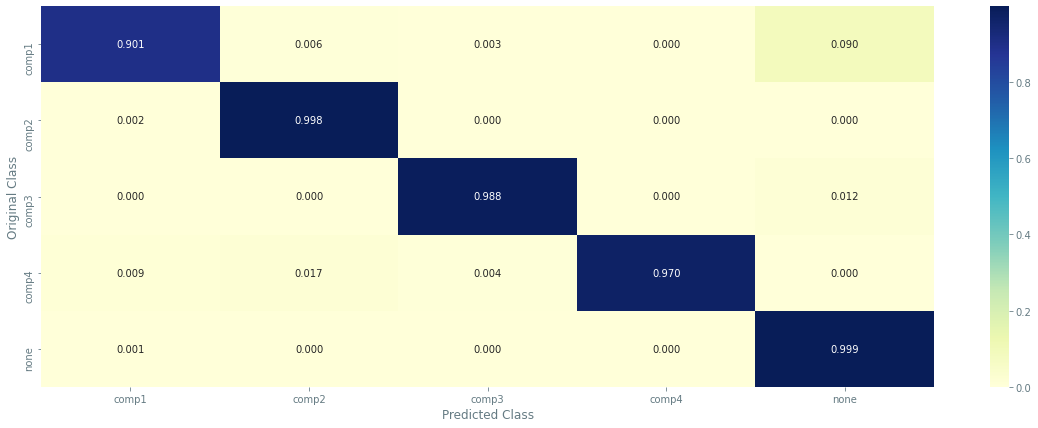

Wall time: 39.4 s


In [35]:
%%time
final_Extra_clf = ExtraTreesClassifier(n_estimators=100, min_samples_split=4, random_state=0)
final_Extra_clf.fit(X_train,y_train)
plot_confusion_matrix(y_test, final_Extra_clf.predict(X_test))

## Apply Bagging Classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [29]:
%%time
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

Bagg_clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)

Bagg_clf.fit(X_train,y_train)

Wall time: 1h 22min 35s


BaggingClassifier(base_estimator=SVC(), random_state=0)

-------------------- Confusion matrix --------------------


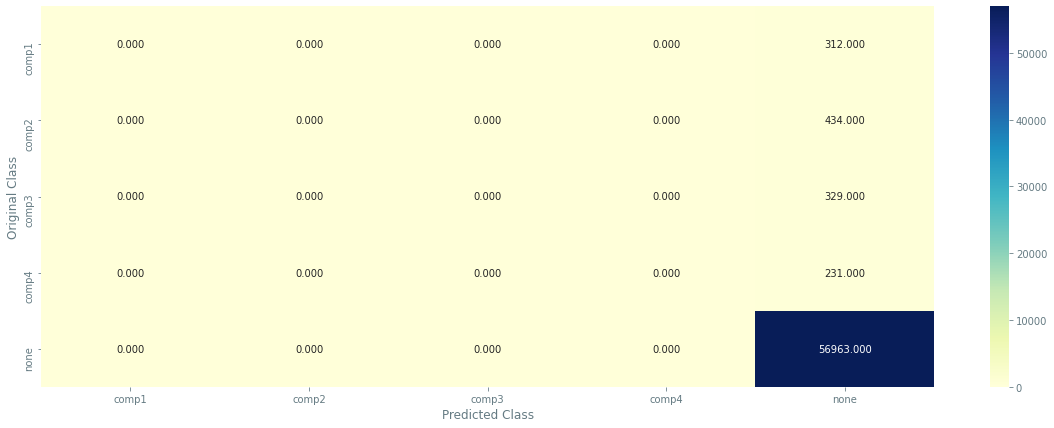

-------------------- Precision matrix (Columm Sum=1) --------------------


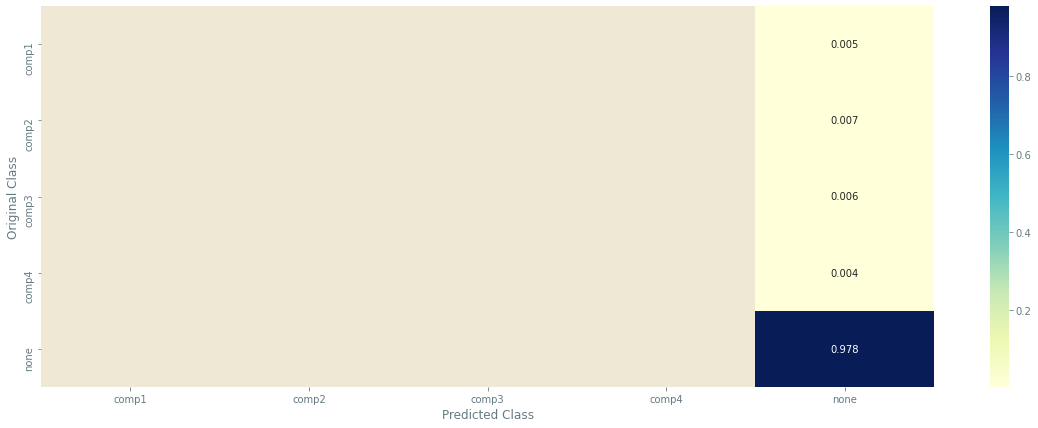

-------------------- Recall matrix (Row sum=1) --------------------


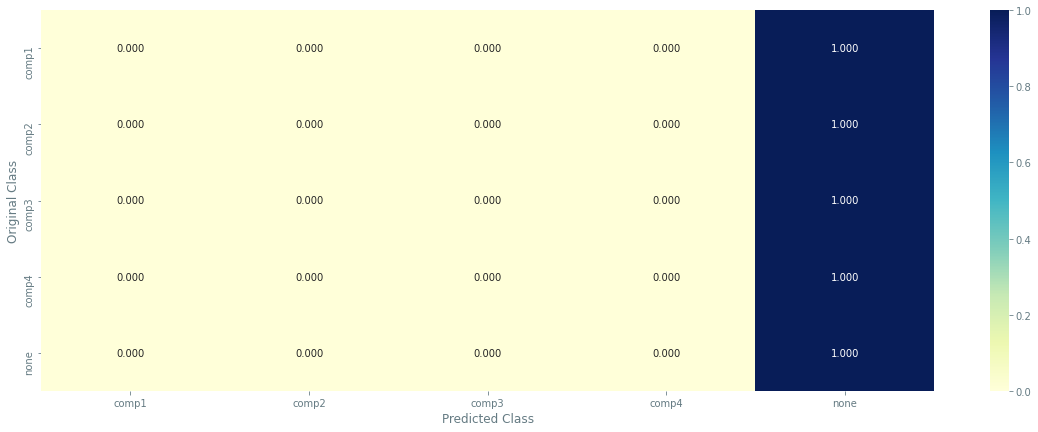

In [30]:
plot_confusion_matrix(y_test, Bagg_clf.predict(X_test))

### Apply Bagging Classifier with RandomizedSearchCV

As the default Bagging Classifier could not able to predict accurately all the classes after running 1 hr. 22 min., so RandomizedSearchCV has not been applied.  

## Apply StackingClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier


In [24]:
%%time
estimators = [ ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
               ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]

Stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

Stack_clf.fit(X_train,y_train)

Wall time: 1min 19s


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

-------------------- Confusion matrix --------------------


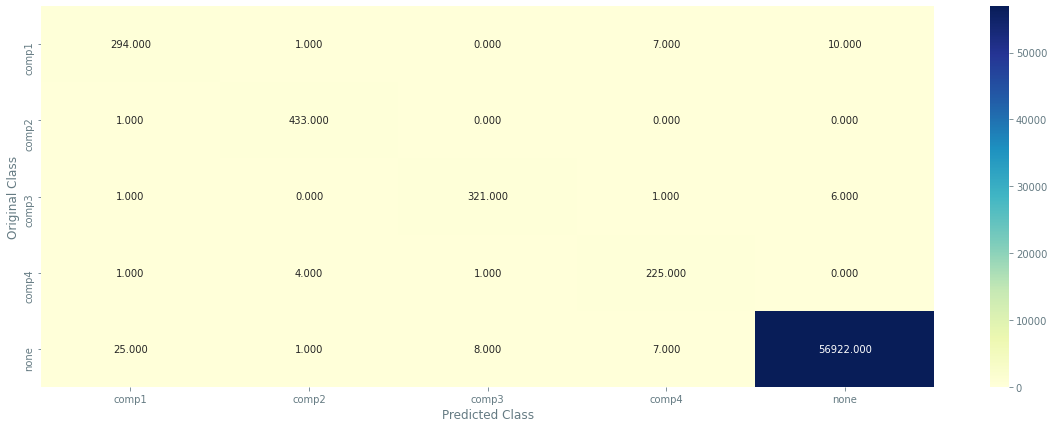

-------------------- Precision matrix (Columm Sum=1) --------------------


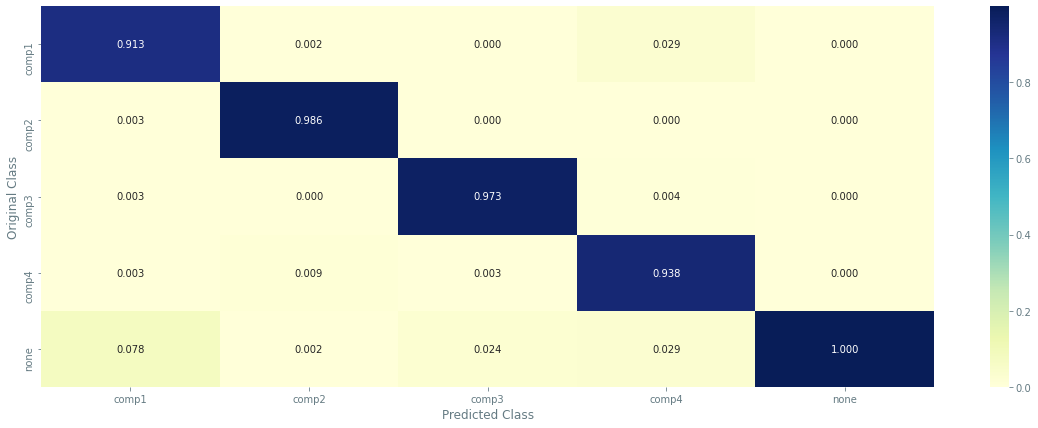

-------------------- Recall matrix (Row sum=1) --------------------


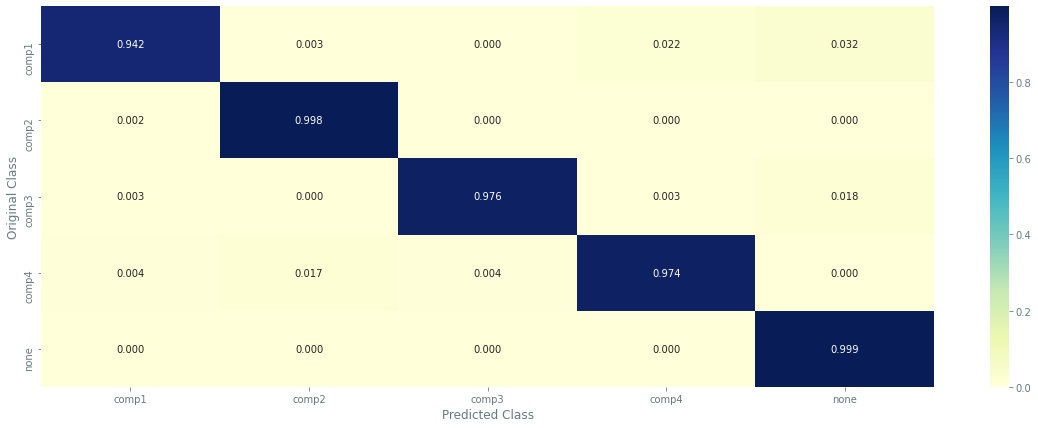

In [25]:
plot_confusion_matrix(y_test, Stack_clf.predict(X_test))

### Apply StackingClassifier with the above tuned models after RandomizedSearchCV

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [46]:
%%time
estimators = [ ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
               ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42))),
                ('final_Linear_clf', LinearSVC(loss='hinge', intercept_scaling=100, C=100)),

('SupportVector_Clf', make_pipeline(StandardScaler(), SVC(C=0.1, kernel='rbf',gamma='auto', class_weight='balanced'))),

('final_Extra_clf', ExtraTreesClassifier(n_estimators=100, min_samples_split=4, random_state=0))
              
]

Stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

Stack_clf.fit(X_train,y_train)

Wall time: 1h 37min 28s


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))])),
                               ('final_Linear_clf',
                                LinearSVC(C=100, intercept_scaling=100,
                                          loss='hinge')),
                               ('SupportVector_Clf',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('svc',
                                                 SVC(C=0.1,
             

-------------------- Confusion matrix --------------------


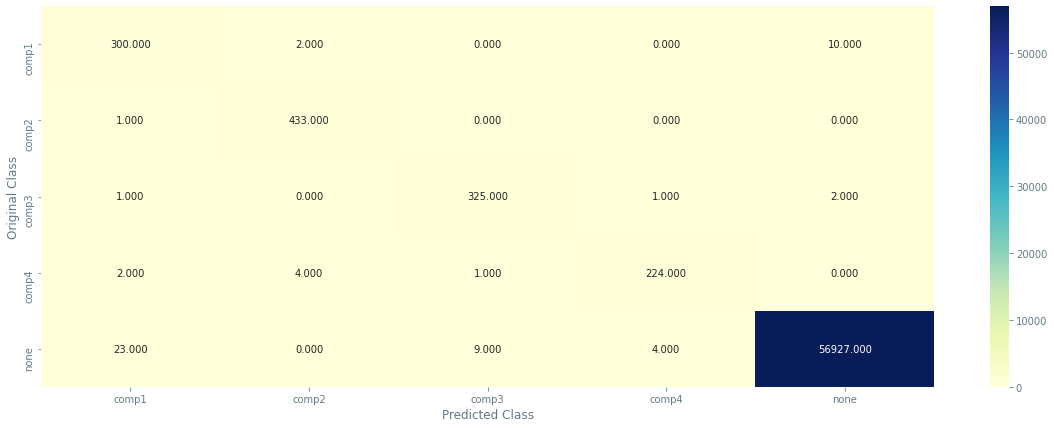

-------------------- Precision matrix (Columm Sum=1) --------------------


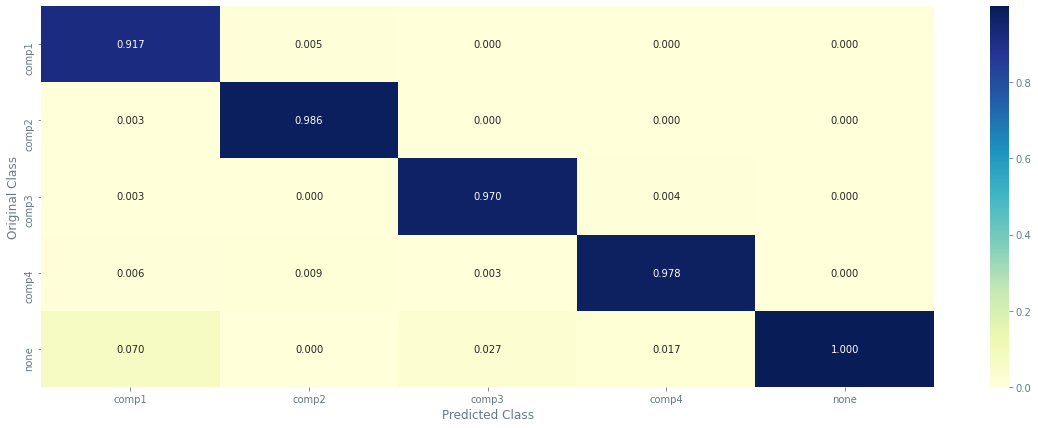

-------------------- Recall matrix (Row sum=1) --------------------


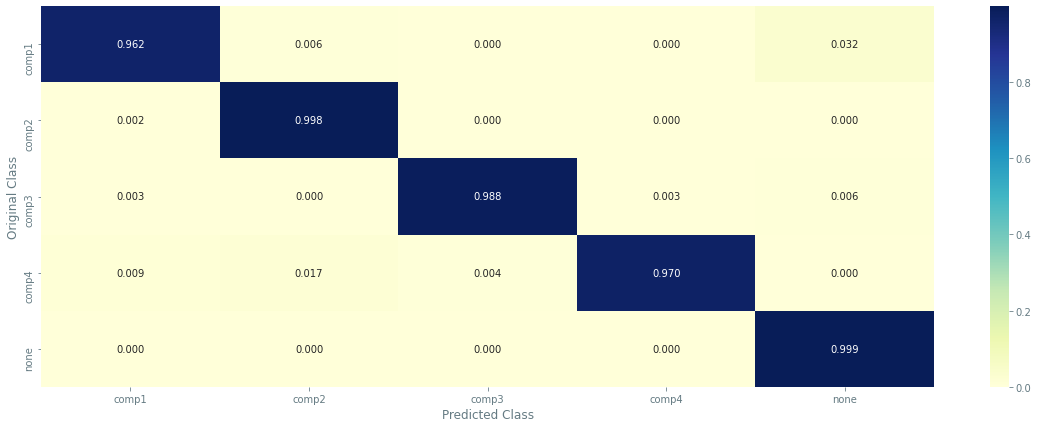

Wall time: 18.9 s


In [48]:
%%time
plot_confusion_matrix(y_test, Stack_clf.predict(X_test))

## Apply model XGBClassifier

In [22]:
from xgboost import XGBClassifier



log_loss for c =  10 is 0.0052202250682890396
log_loss for c =  50 is 0.004849055566481841
log_loss for c =  100 is 0.004854024120432239
log_loss for c =  500 is 0.004879008539054286
log_loss for c =  1000 is 0.004823914114292372


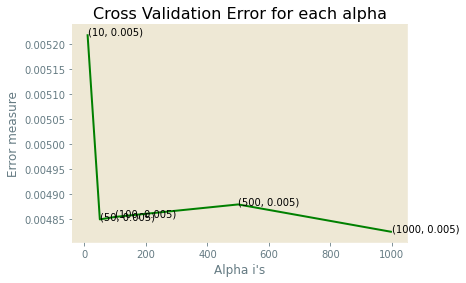

Wall time: 1h 50min 20s


In [23]:
%%time

plt.close()
from sklearn.calibration import CalibratedClassifierCV
from tqdm import tqdm_notebook
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

alpha=[10,50,100,500,1000]

# alpha=[10,50]
cv_log_error_array=[]
for i in tqdm_notebook(alpha):
    x_cfl=XGBClassifier(n_estimators=i, eval_metric='mlogloss')
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [24]:
%%time
# plt.close()
x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1, eval_metric='mlogloss')
x_cfl.fit(X_train, y_train, verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))

For values of best alpha =  1000 The train log loss is: 0.000859735884220336
For values of best alpha =  1000 The cross validation log loss is: 0.004823914114292372
For values of best alpha =  1000 The test log loss is: 0.0027397298352827143
Wall time: 1h 7min 30s


-------------------- Confusion matrix --------------------


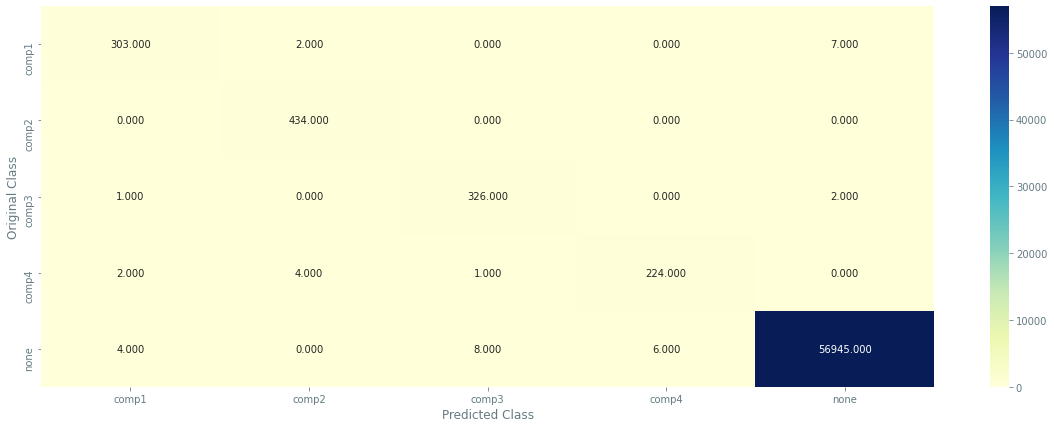

-------------------- Precision matrix (Columm Sum=1) --------------------


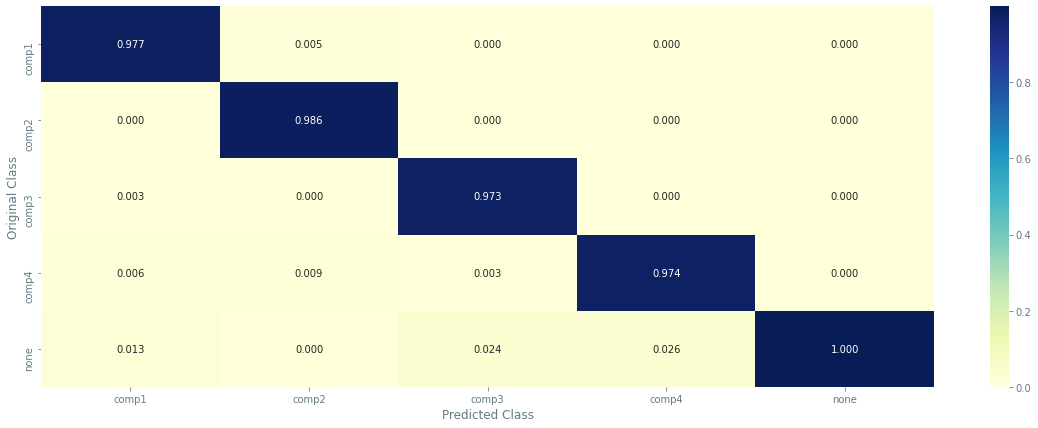

-------------------- Recall matrix (Row sum=1) --------------------


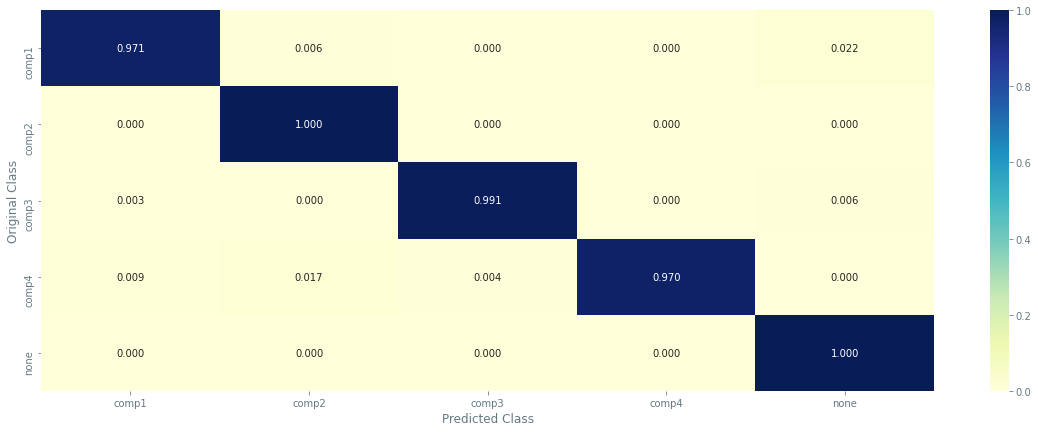

In [25]:
plt.close()
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

In [26]:
np.unique(y_test, return_counts= True)

(array(['comp1', 'comp2', 'comp3', 'comp4', 'none'], dtype=object),
 array([  312,   434,   329,   231, 56963], dtype=int64))

## Apply model Logistic Regression


log_loss for c =  0.001 is 0.06518716314699854
log_loss for c =  0.01 is 0.06503467772274903
log_loss for c =  0.1 is 0.06495028805081593
log_loss for c =  1 is 0.06508041341057216
log_loss for c =  10 is 0.0650524592172297
log_loss for c =  100 is 0.06491878681861979


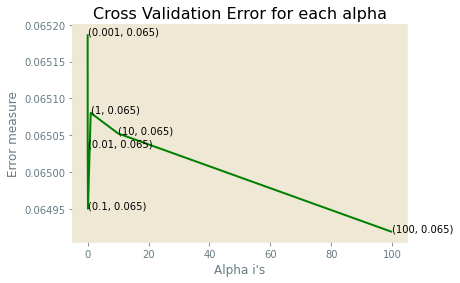

log loss for train data 0.060343700896886156
log loss for cv data 0.06491878681861979
log loss for test data 0.07155809375849279
-------------------- Confusion matrix --------------------


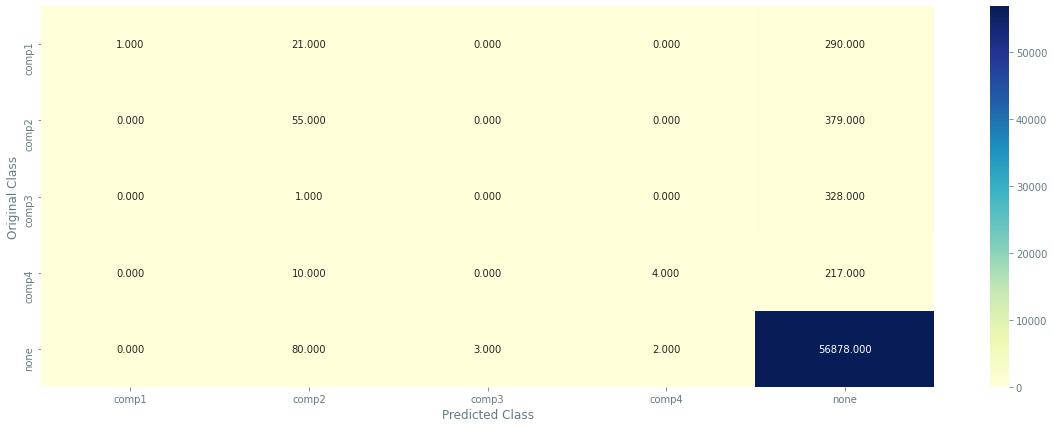

-------------------- Precision matrix (Columm Sum=1) --------------------


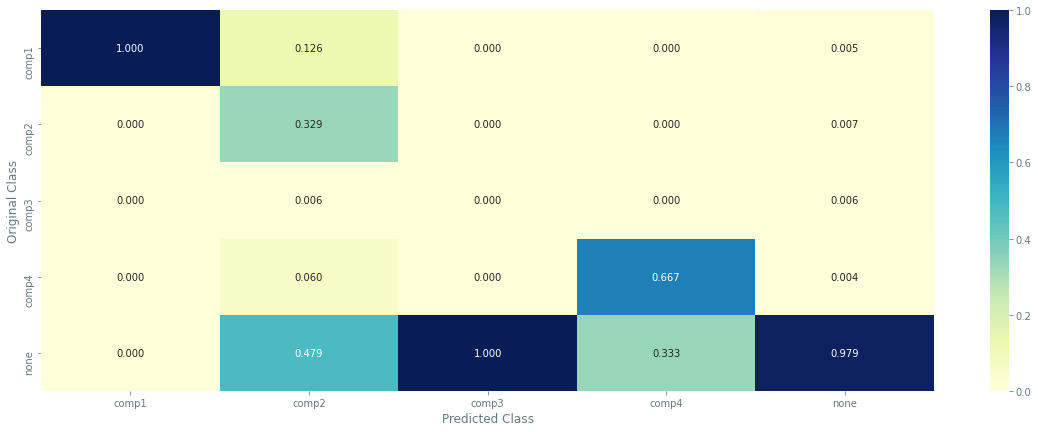

-------------------- Recall matrix (Row sum=1) --------------------


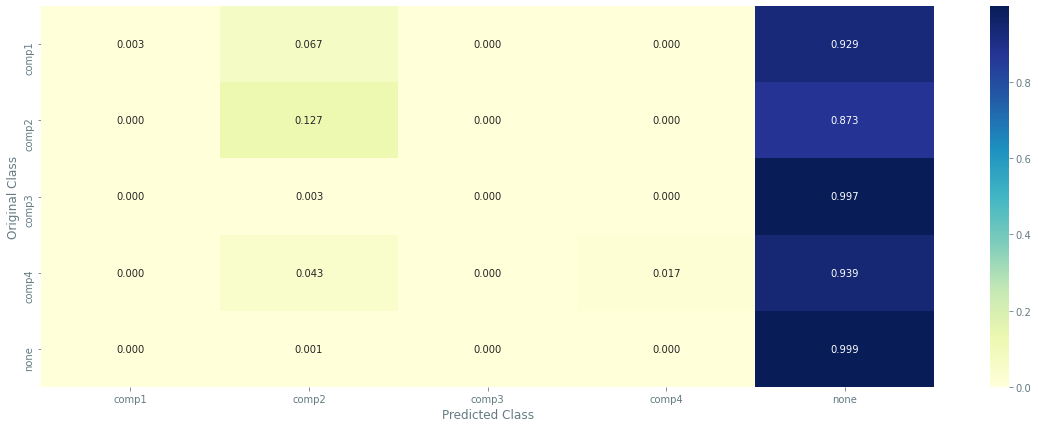

Wall time: 7min 53s


In [27]:
%%time
from sklearn.linear_model import LogisticRegression

alpha = [10 ** x for x in range(-3, 3)]
cv_log_error_array=[]
for i in tqdm_notebook(alpha):
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

## Apply model Random Forest Classifier


log_loss for c =  10 is 0.005918209826534233
log_loss for c =  50 is 0.0053506171303372985
log_loss for c =  100 is 0.005117716955582012
log_loss for c =  500 is 0.005102621513234204
log_loss for c =  1000 is 0.00512437535505185


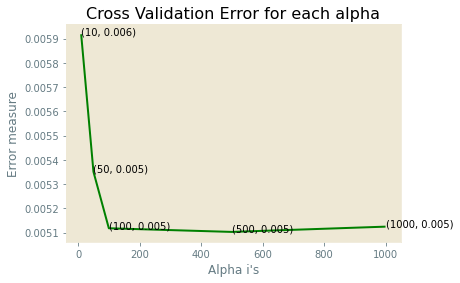

For values of best alpha =  500 The train log loss is: 0.000758855734542727
For values of best alpha =  500 The cross validation log loss is: 0.005102621513234204
For values of best alpha =  500 The test log loss is: 0.00284202719543717
-------------------- Confusion matrix --------------------


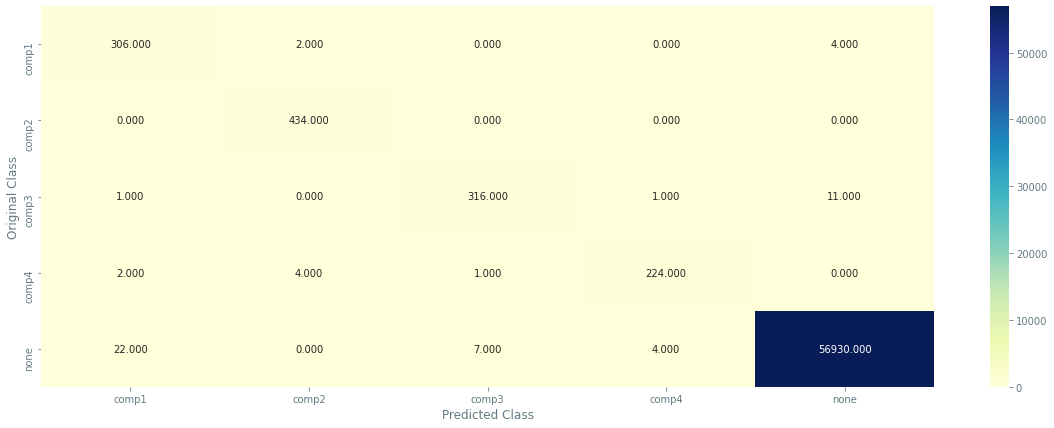

-------------------- Precision matrix (Columm Sum=1) --------------------


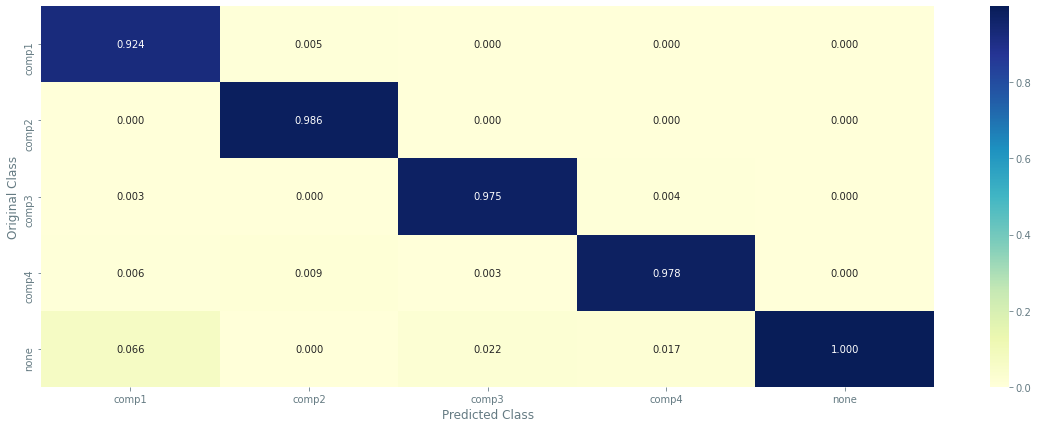

-------------------- Recall matrix (Row sum=1) --------------------


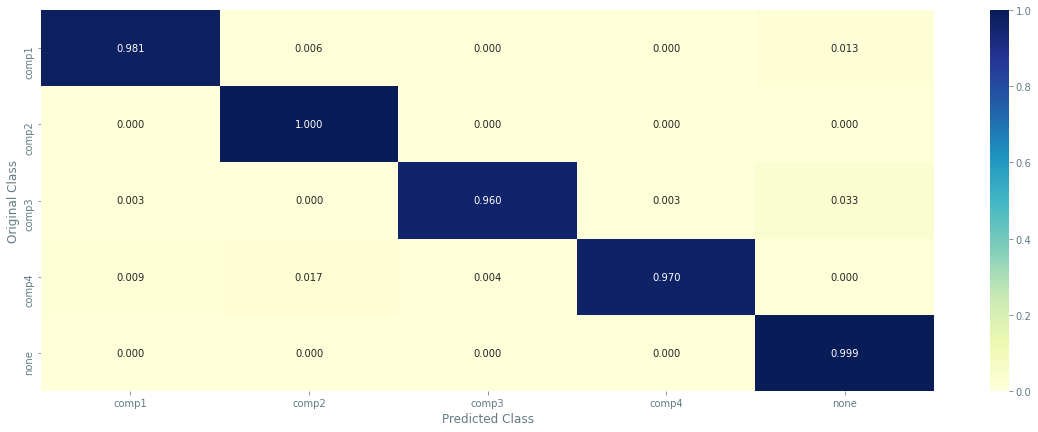

Wall time: 56min 39s


In [28]:
%%time
from sklearn.ensemble import RandomForestClassifier

alpha=[10,50,100,500,1000]
cv_log_error_array=[]
train_log_error_array=[]
for i in tqdm_notebook(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

### Apply model Random Forest Classifier with RandomSearchCV

In [50]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
ran_cfl=RandomForestClassifier()

prams={
     'n_estimators':[100,500,1000],
     'max_depth':[None, 3, 11, 33],
    'min_samples_split':[2, 5, 11],
    'max_features':['sqrt', 'log2', None],
    'bootstrap':[True, False]
}

randomCV_cfl1=RandomizedSearchCV(ran_cfl, param_distributions=prams, verbose=10, n_jobs=-1)
randomCV_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 56.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 102.2min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 194.8min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 265.3min remaining: 58.2min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 297.9min remaining: 19.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 306.1min finished


Wall time: 5h 17min 43s


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 11, 33],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_split': [2, 5, 11],
                                        'n_estimators': [100, 500, 1000]},
                   verbose=10)

In [51]:
print(randomCV_cfl1.best_params_)

{'n_estimators': 500, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 33, 'bootstrap': False}


-------------------- Confusion matrix --------------------


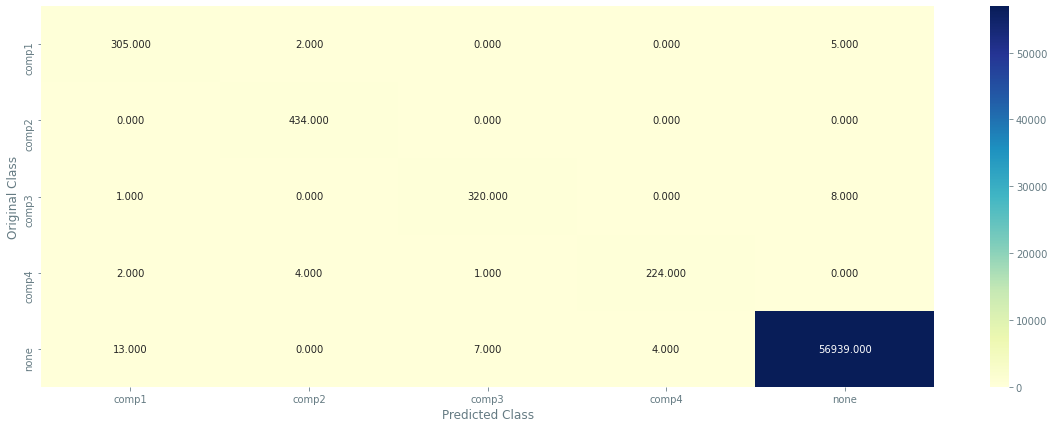

-------------------- Precision matrix (Columm Sum=1) --------------------


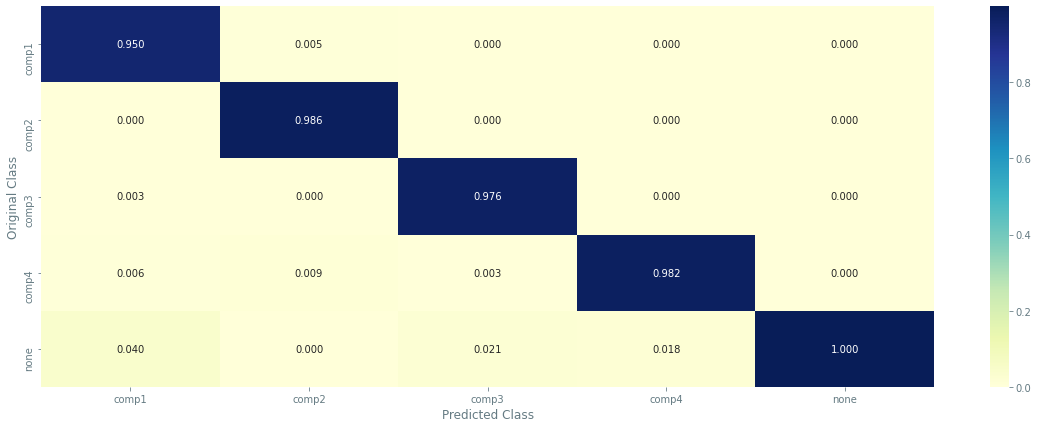

-------------------- Recall matrix (Row sum=1) --------------------


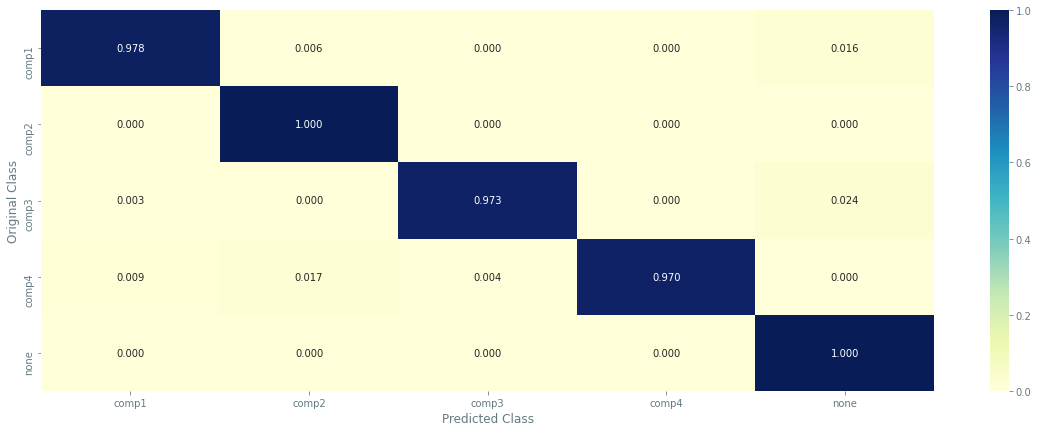

Wall time: 16min 58s


In [53]:
%%time
final_ran_cfl=RandomForestClassifier(n_estimators= 500, min_samples_split=5,max_features='sqrt',bootstrap=False)
final_ran_cfl.fit(X_train,y_train)
plot_confusion_matrix(y_test, final_ran_cfl.predict(X_test))

## XgBoost Classification with best hyper parameters using RandomSearch

In [29]:
%%time
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
from sklearn.model_selection import RandomizedSearchCV
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15],
     'n_estimators':[100,500,1000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl, param_distributions=prams, verbose=10, n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 49.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 103.2min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 138.2min remaining: 30.3min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 146.9min remaining:  9.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 148.0min finished


[18:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 2h 30min 43s


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=N

In [30]:
print(random_cfl1.best_params_)

{'subsample': 1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.15, 'colsample_bytree': 0.3}


In [32]:
x_cfl=XGBClassifier(n_estimators=500, learning_rate=0.15, colsample_bytree=0.3, max_depth=3)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

[18:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

-------------------- Confusion matrix --------------------


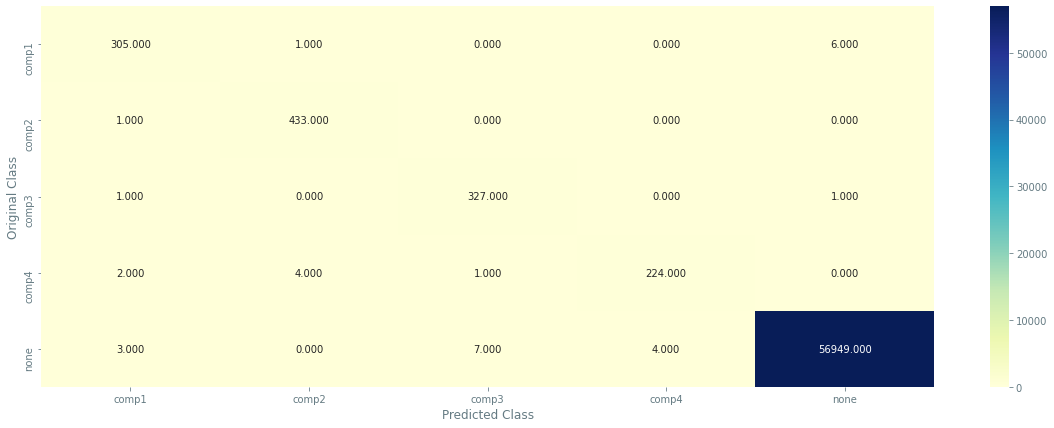

-------------------- Precision matrix (Columm Sum=1) --------------------


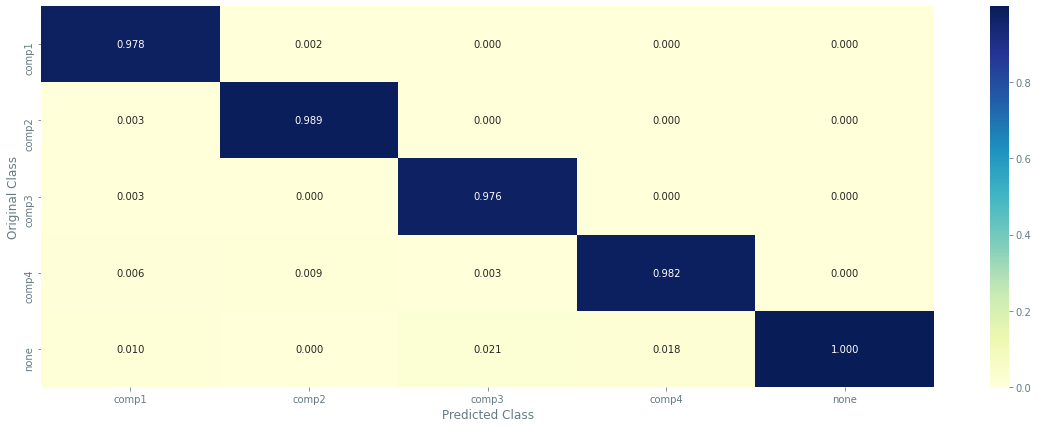

-------------------- Recall matrix (Row sum=1) --------------------


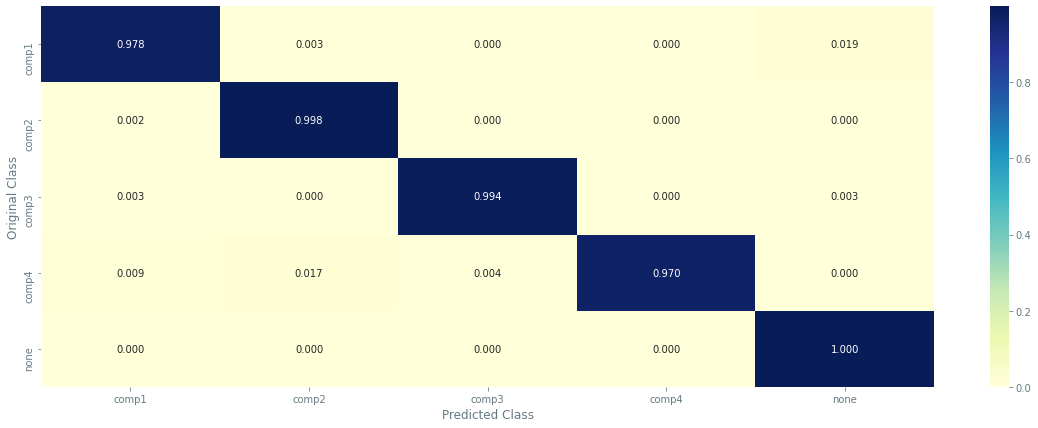

In [33]:
plot_confusion_matrix(y_test, c_cfl.predict(X_test))

<b> Let's plot Feature Importance of the XGBClassifier.

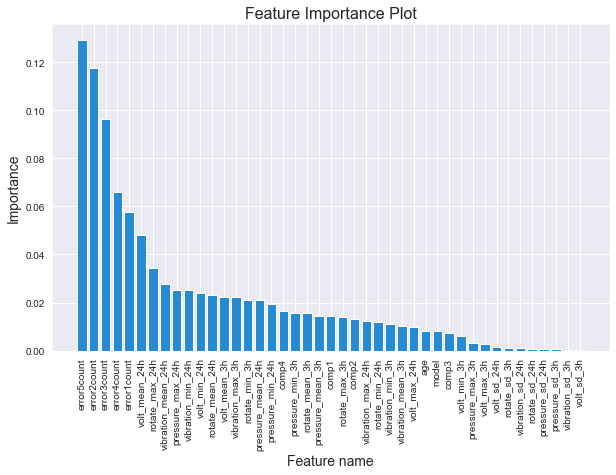

In [34]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
#https://stackoverflow.com/questions/8966538/syntax-behind-sortedkey-lambda
#https://realpython.com/python-zip-function/--->operator * to unzip the data
labels, importances = zip(*sorted(zip(X.columns, x_cfl.feature_importances_), 
                                  reverse=True, key=lambda x: x[1]))

# print(len(labels), len(importances))
plt.xticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(range(len(importances)), importances)
plt.ylabel('Importance', fontsize=14)
plt.xlabel("Feature name", fontsize=14)
plt.title("Feature Importance Plot")
plt.show()

In [36]:
#Save the model
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(c_cfl, open(filename, 'wb'))
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)


0.9993993375551322


## Model Evaluation and Comparison

In predictive maintenance, machine failures are usually rare occurrences in the lifetime of the assets compared to normal operation. This causes an imbalance in the label distribution which usually causes poor performance as algorithms tend to classify majority class examples better at the expense of minority class examples as the total misclassification error is much improved when majority class is labeled correctly. This causes low recall rates although accuracy can be high and becomes a larger problem when the cost of false alarms to the business is very high. To help with this problem, sampling techniques such as oversampling of the minority examples are usually used along with more sophisticated techniques which are not covered in this notebook.

In predictive maintenance, we are often most concerned with how many of the actual failures were predicted by the model, i.e. the model's recall. (Recall becomes more important as the consequences of false negatives -- true failures that the model did not predict -- exceed the consequences of false positives, viz. false prediction of impending failure.) Below, we compare the recall rates for each failure type for the above models. For example, if recall rates for all components failure as well as no failure are all above 96%, it means the model is able to capture above 96% of the failures correctly.

In [55]:
from prettytable import PrettyTable

# Specify the Column Names
myTable = PrettyTable(["Model name (Recall score )", "comp1", "comp2", "comp3", 'comp4', 'none(no fail)'])

# Add rows

myTable.add_row(["Xgboost model without calibration (from FE part)", 
                 "0.984", "1", "1", "0.974", "1"])

#rev_1
myTable.add_row(["LinearSVC default model", 
                 "0.792", "0.959", "0.012", "0.965", "0.998"])

#rev_1
myTable.add_row(["LinearSVC with RandomizedSearchCV", 
                 "0.901", "0.998", "0.988", "0.970", "0.999"])

#rev_1
myTable.add_row(["Support Vector Classification default model", 
                 "0.981", "0.965", "0.985", "0.922", "0.999"])

#rev_1
myTable.add_row(["Extra Trees Classifier default model", 
                 "0.939", "0.998", "0.991", "0.961", "0.999"])

#rev_1
myTable.add_row(["Extra Trees Classifier with RandomizedSearchCV", 
                 "0.901", "0.998", "0.988", "0.970", "0.999"])

#rev_1
myTable.add_row(["Bagging Classifier default model", 
                 "0.000", "0.000", "0.000", "0.000", "1"])

#rev_1
myTable.add_row(["StackingClassifier (RandomForestClf.+LinearSVC)", 
                 "0.942", "0.998", "0.976", "0.974", "0.999"])
#rev_1
myTable.add_row(["StackingClassifier with the tuned models", 
                 "0.962", "0.998", "0.988", "0.970", "0.999"])

#Model with calibration
myTable.add_row(["Xgboost only one hyper-parameter tuning", 
                 "0.971", "1", "0.991", "0.970", "1"])


#Model with calibration
myTable.add_row(["Logistic Regression with hyper-parameter tuning ", 
                 "0.0003", "0.127", "0", "0.017", "0.999"])

#Model with calibration
myTable.add_row(["Random Forest only one hyper-parameter tuning", 
                 "0.981", "1", "0.960", "0.970", "0.999"])

#rev_1
myTable.add_row(["Random Forest with RandomSearchCV", 
                 "0.978", "1", "0.973", "0.970", "1"])

#Model with calibration
myTable.add_row(["XgBoost with best hyper parameters tuning", 
                 "0.978", "0.998", "0.994", "0.970", "1"])

print(myTable)


+--------------------------------------------------+--------+-------+-------+-------+---------------+
|            Model name (Recall score )            | comp1  | comp2 | comp3 | comp4 | none(no fail) |
+--------------------------------------------------+--------+-------+-------+-------+---------------+
| Xgboost model without calibration (from FE part) | 0.984  |   1   |   1   | 0.974 |       1       |
|             LinearSVC default model              | 0.792  | 0.959 | 0.012 | 0.965 |     0.998     |
|        LinearSVC with RandomizedSearchCV         | 0.901  | 0.998 | 0.988 | 0.970 |     0.999     |
|   Support Vector Classification default model    | 0.981  | 0.965 | 0.985 | 0.922 |     0.999     |
|       Extra Trees Classifier default model       | 0.939  | 0.998 | 0.991 | 0.961 |     0.999     |
|  Extra Trees Classifier with RandomizedSearchCV  | 0.901  | 0.998 | 0.988 | 0.970 |     0.999     |
|         Bagging Classifier default model         | 0.000  | 0.000 | 0.000 | 0.00

## Observation on the above approach:
From the above comparison table, the last model "XgBoost with best hyper parameters tuning" will be a good model for prediction of component failure in advance (next 24 hours).This model can predict the failure due to comp2 and comp3 and state of 'none' perfectly. However, this model can predict the failure around 97% correctly for comp1 and comp4.


# >>>> End of "Model_Building_Case_study_1" <<<<